## ANÁLISIS DE DATOS

Importar los paquetes necesarios

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from matplotlib.dates import DateFormatter

Cargar el conjunto de datos

In [50]:
begin_inventory=pd.read_csv('BegInvFINAL12312016.csv')
end_inventory=pd.read_csv('EndInvFINAL12312016.csv')
purchases=pd.read_csv('PurchasesFINAL12312016.csv')
purchase_prices=pd.read_csv('2017PurchasePricesDec.csv')
purchase_invoices=pd.read_csv('InvoicePurchases12312016.csv')
sales=pd.read_csv('SalesFINAL12312016.csv')

Para tener una idea general de los datos, se han impreso las primeros 5lineas de cada tabla

In [51]:
begin_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [52]:
end_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [53]:
purchases.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [54]:
purchase_prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [55]:
purchase_invoices.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [56]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


### Análisis exploratorio de datos

A continuación, se ha realizado el análisis exploratorio de datos, obteniendo una tabla donde se tiene detalles clave sobre los conjuntos de datos, como numero de columnas y filas, tipos de datos, valores no informados... Esta visión global ayuda a identificar errores, contribuyendo a la posterior limpieza y preprocesamiento de los datos.

In [57]:
# Se ha creado una función donde devuelve una tabla con la info necesaria para obtener información de los datos.
def dataframe_info(df):
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Rows', 'Unique Count', 'Missing Values', 'Missing Percentage'])
    for column in df.columns:
        data_type = df[column].dtype
        rows = df[column].shape[0] 
        unique_count = df[column].nunique()
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report.loc[len(report)] = [column, data_type, rows, unique_count,  missing_values, missing_percentage.round(4)]
    return report

In [58]:
dataframe_info(begin_inventory)

,Column,Data Type,Rows,Unique Count,Missing Values,Missing Percentage
0,InventoryId,object,206529,206529,0,0.0
1,Store,int64,206529,79,0,0.0
2,City,object,206529,67,0,0.0
3,Brand,int64,206529,8094,0,0.0
4,Description,object,206529,7291,0,0.0
5,Size,object,206529,41,0,0.0
6,onHand,int64,206529,474,0,0.0
7,Price,float64,206529,329,0,0.0
8,startDate,object,206529,1,0,0.0


In [59]:
dataframe_info(end_inventory)

,Column,Data Type,Rows,Unique Count,Missing Values,Missing Percentage
0,InventoryId,object,224489,224489,0,0.000
1,Store,int64,224489,80,0,0.000
2,City,object,224489,67,1284,0.572
3,Brand,int64,224489,9653,0,0.000
4,Description,object,224489,8732,0,0.000
5,Size,object,224489,47,0,0.000
6,onHand,int64,224489,548,0,0.000
7,Price,float64,224489,354,0,0.000
8,endDate,object,224489,1,0,0.000


In [60]:
dataframe_info(purchases)

,Column,Data Type,Rows,Unique Count,Missing Values,Missing Percentage
0,InventoryId,object,2372474,245907,0,0.0000
1,Store,int64,2372474,80,0,0.0000
2,Brand,int64,2372474,10664,0,0.0000
3,Description,object,2372474,9652,0,0.0000
4,Size,object,2372474,51,3,0.0001
5,VendorNumber,int64,2372474,126,0,0.0000
6,VendorName,object,2372474,129,0,0.0000
7,PONumber,int64,2372474,5543,0,0.0000
8,PODate,object,2372474,319,0,0.0000
9,ReceivingDate,object,2372474,364,0,0.0000


In [61]:
dataframe_info(purchase_prices)

,Column,Data Type,Rows,Unique Count,Missing Values,Missing Percentage
0,Brand,int64,12261,12261,0,0.0000
1,Description,object,12261,11114,1,0.0082
2,Price,float64,12261,380,0,0.0000
3,Size,object,12261,56,1,0.0082
4,Volume,object,12261,33,1,0.0082
5,Classification,int64,12261,2,0,0.0000
6,PurchasePrice,float64,12261,2314,0,0.0000
7,VendorNumber,int64,12261,131,0,0.0000
8,VendorName,object,12261,136,0,0.0000


In [62]:
dataframe_info(purchase_invoices)

,Column,Data Type,Rows,Unique Count,Missing Values,Missing Percentage
0,VendorNumber,int64,5543,126,0,0.0000
1,VendorName,object,5543,129,0,0.0000
2,InvoiceDate,object,5543,373,0,0.0000
3,PONumber,int64,5543,5543,0,0.0000
4,PODate,object,5543,319,0,0.0000
5,PayDate,object,5543,382,0,0.0000
6,Quantity,int64,5543,2895,0,0.0000
7,Dollars,float64,5543,5226,0,0.0000
8,Freight,float64,5543,4052,0,0.0000
9,Approval,object,5543,1,5169,93.2528


In [63]:
dataframe_info(sales)

,Column,Data Type,Rows,Unique Count,Missing Values,Missing Percentage
0,InventoryId,object,1048575,170131,0,0.0
1,Store,int64,1048575,79,0,0.0
2,Brand,int64,1048575,7658,0,0.0
3,Description,object,1048575,6890,0,0.0
4,Size,object,1048575,40,0,0.0
5,SalesQuantity,int64,1048575,141,0,0.0
6,SalesDollars,float64,1048575,3426,0,0.0
7,SalesPrice,float64,1048575,273,0,0.0
8,SalesDate,object,1048575,60,0,0.0
9,Volume,int64,1048575,22,0,0.0


La exploración de datos ayuda a identificar irregularidades que necesitan limpieza y preprocesamiento:

- Los InventoryId tanto en beginning_inventory como en ending_inventory tienen recuentos únicos iguales a los recuentos totales. Esto sugiere que podrían servir como claves primaria y foránea para unir las dos tablas. A pesar de tener atributos idénticos (excepto las columnas de inventario), es posible que los ID no coincidan. Otros conjuntos de datos carecen de una clave primaria específica, ya que el recuento total difiere de los recuentos únicos. Por lo tanto, hay que tener cuidado al unir tablas.
- Algunas tablas contienen valores omitidos que es necesario identificar y tratar adecuadamente.
- Las columnas de tamaño en todas las tablas muestran incoherencias debido a la variación de las unidades de medida. Algunos ejemplos son 750mL, Litro, 750mL + 2/,2 Pk, 50mL 4 Pk, 750mL 3 Pk. Es necesario convertirlas a una unidad de medida única y coherente.
- Las columnas Tamaño y Volumen llevan datos duplicados y una de ellas puede eliminar.
- El formato de fecha difiere entre tablas. Por ejemplo, la tabla de ventas utiliza d/m/aaaa, mientras que otras utilizan aaaa/mm/dd.
- Algunas columnas contienen espacios finales entre las entradas, como se ve en la columna VendorName de la tabla de compras (por ejemplo, ALTAMAR BRANDS LLC ,).

### Limpieza y preprocesamiento de datos
 

A. Tratamiento de Missings:

- Las tablas "begin_inventory" y "sales" no tienen valores faltantes, por lo que nos concentraremos en las otras cuatro tablas.

- En la tabla "end_inventory" en la columna "city": De un total de 224.489 entradas, faltan 1.284 valores. Al examinar los otros 66 nombres únicos de ciudades y sus correspondientes ubicaciones de tienda, todas las ciudades tienen nombre excepto la ciudad vinculada a la ubicación de tienda 46. Por lo tanto, es razonable asignarle el nombre TYWARDREATH, que corresponde a su número de tienda.

- Missings en la tabla "purchases" en la columna "size": Sólo faltan 3 valores de un total de 2.372.474 entradas, por lo que se ha decidiso eliminar esas filas. 

- Missings en la tabla "Sales" en la columna "Approval": Faltan informacion en 5.169 registros de un total de 5.543, lo que supone el 93% del total.  Dado el alto porcentaje de valores faltantes, se ha decidido eliminar la columna.

- Missings en la tabla "purchase_prices": Faltan valores individuales en las columnas "Description", "Size" y "Volume". En estos casos como estamos hablando de un solo registro en cada caso, se ha decidido elimar dichas filas.

In [64]:
#Tratamiento de los Missing

#Tabla end_inventory, columna "City"
end_inventory["City"] = end_inventory["City"].fillna("TYWARDREATH")

#Tabla purchases, columna "Size"
purchases = purchases[purchases['Size'].notna()]

#Tabla purchase_invoices, columna "Approval" 
purchase_invoices = purchase_invoices.drop(['Approval'], axis=1)

#Tabla purchase_pricesa, columnas "Description", "Size", "Volume"
purchase_prices.dropna(subset=["Description"], inplace=True)
purchase_prices.dropna(subset=["Size"], inplace=True)
purchase_prices.dropna(subset=["Volume"], inplace=True)

# Funcion para confirmar que se han eliminado los missings
def check_missing_values(*datasets):
    for dataset_name, dataset in datasets:
        missing_values_count = {}
        for idx, column_name in enumerate(dataset.columns):
            missing_count =dataset[column_name].isnull().sum()
            if missing_count > 0:
                missing_values_count[column_name] = missing_count
        
        if len(missing_values_count) == 0:
            print(f"Valores no informacdos es {dataset_name} = {len(missing_values_count)}")
        else:
            for column_name, count in missing_values_count.items():
                print(f"Columna: {column_name}, Valores no informados: {count}")
       
check_missing_values(("Begin_inventory", begin_inventory),
                     ("End_inventory", end_inventory),
                     ("Purchases", purchases),
                     ("Purchase_invoices", purchase_invoices),
                     ("Purchase_prices", purchase_prices),
                     ("Sales", sales))

Valores no informacdos es Begin_inventory = 0
Valores no informacdos es End_inventory = 0
Valores no informacdos es Purchases = 0
Valores no informacdos es Purchase_invoices = 0
Valores no informacdos es Purchase_prices = 0
Valores no informacdos es Sales = 0


B. Tratamiento de duplicados

A continuación se ha comprobado si las bases de datos contienen valores duplicados.

In [65]:
# Comprobacion de duplicados
datasets = [begin_inventory, end_inventory, purchases, purchase_invoices, purchase_prices, sales]

for i, df in enumerate(datasets, start=1):
    duplicados = df.duplicated().any()
    if duplicados:
        print(f"El dataset {i} tiene duplicados.")
    else:
        print(f"El dataset {i} no tiene duplicados.")
    print("-" * 35)  # Separador entre datasets

El dataset 1 no tiene duplicados.
-----------------------------------
El dataset 2 no tiene duplicados.
-----------------------------------
El dataset 3 no tiene duplicados.
-----------------------------------
El dataset 4 no tiene duplicados.
-----------------------------------
El dataset 5 no tiene duplicados.
-----------------------------------
El dataset 6 no tiene duplicados.
-----------------------------------


C. Irregularidades en las entradas de datos.

La columna Size varía en todos las tablas, excepto en el conjunto de datos purchase_price. La información sobre el tamaño, que representa el volumen, se introduce en varios formatos, como litro, mililitro, onza, paquete (pk) y combinaciones de los mismos. Por lo tanto, estas medidas se tienen que convertir en un litro estándar unificado. Primero de todo se han comprobado los recuentos únicos. A los que tengan un solo recuento y no presenten un patrón, se les a asignado una tasa equivalente. A los que tengan varios recuentos y un patrón, se han convertido según los patrones.

In [66]:
# Se ha observado el patron, obteniendo un recuento unico de cada entrada de tamaño en todos os conjuntos de datos 
data_frames = [begin_inventory, end_inventory, purchases, purchases, sales]
all_sizes = pd.concat([df["Size"] for df in data_frames])
unique_sizes = all_sizes.unique()
size_counts = {}
for size in unique_sizes:
    size_counts[size] = all_sizes[all_sizes == size].count()
unique_sizes_with_counts = pd.DataFrame({
    'Size': unique_sizes,
    'Total Count': [size_counts[size] for size in unique_sizes]})
print(unique_sizes_with_counts)

          Size  Total Count
0        750mL      3311239
1        Liter       121440
2        1.75L      1403019
3         50mL       268606
4        375mL       209161
5    50mL 4 Pk         2893
6   375mL 2 Pk          757
7   750mL 3 Pk          196
8   375mL 3 Pk          121
9   750mL + 3/          425
10  200mL 3 Pk          724
11   50mL 3 Pk         1083
12  100mL 4 Pk         3257
13       100mL         5052
14   50mL 5 Pk         2774
15  200mL 4 Pk         3297
16  250mL 4 Pk         3675
17  750mL 2 Pk          681
18       200mL         4159
19     3/100mL          593
20        1.5L       551970
21          5L       122549
22          4L        14426
23  187mL 4 Pk        29249
24          3L       127860
25      5.0 Oz          901
26       187mL         8057
27       500mL        15067
28  187mL 3 Pk         2849
29       300mL         2594
30  50mL 12 Pk           32
31       330mL          569
32       250mL         1539
33         18L          493
34  750mL + 2/      

A partir de la salida de recuentos únicos, se ha observado  que hay 51 formas diferentes de expresar medidas de volumen.
Se han utilizado expresiones regulares para recorrerlos y aplicar tipos de conversión. Se han agrupado en tres patrones:
1) Ejemplos: 750ml, 750mL, 750ml + 3/, 750 4p, 750 4pk, etc.
2) Patrones como Litro, L o l
3) Tamaños expresados en Oz.

Se ha creado una funcion para aplicar estas conversiones a todos los conjuntos de datos.

In [67]:
# Hand the irregulatities of size in all datasets(datasets) 
def convert_to_liters(size):
    size = str(size).lower()
    # Convert 3/100ml and 5/2 -->  
    if "3/100ml" in size: return round(3 * 0.01, 2)  #3/100ml--> 3 packs of 100ml 
    elif '5/2 oz' in size: return round(10 * 0.0295735, 2)  #5/2 oz --> 5 packs of 1/2
    
    #covert Gallon to liter
    elif 'gal' in size:
        gal_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(gal_value * 3.786, 2)   
    
    #handle pattern such as 750ml, 750mL, 750ml + 3/, 750 4p, 750  4pk, etc
    elif 'ml' in size:
        if 'p' in size:
            ml_value, pack_value = re.search(r'(\d+\.*\d*)\s*m*l*\s*(\d*)\s*p*/*P*k*/*', size).groups()
            ml_value = float(ml_value)
            pack_value = float(pack_value) if pack_value else 1
            return round(ml_value * pack_value / 1000, 2)  # p or pk means pack--> multiply
        elif '+' in size:
            ml_value, pack_value = map(float, re.findall(r'\d+\.*\d*', size))
            return round((ml_value + (pack_value * 50)) / 1000, 2)  
        else:
            ml_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(ml_value / 1000, 2)  
    
    # convert Liter or L or l
    elif 'liter' in size or 'l' in size:
        if size == 'liter' or size == 'l': return 1.00
        else:
            liter_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(liter_value, 2)  
    
    #ounces to liters    
    elif 'oz' in size:
        oz_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(oz_value * 0.0295735, 2) 
    else:
        return None

datasets = [begin_inventory, end_inventory, purchases, purchase_prices, sales]

# Apply the conversion function to each dataframe
for i, dataset in enumerate(datasets):
    dataset['Size'] = dataset['Size'].apply(convert_to_liters)
    datasets[i] = dataset

# Print the converted datasets
for i, dataset in enumerate(datasets):
    print(f"DataFrame {i+1}:")
    print(dataset)
    print()

DataFrame 1:
               InventoryId  Store          City  Brand  \
0        1_HARDERSFIELD_58      1  HARDERSFIELD     58   
1        1_HARDERSFIELD_60      1  HARDERSFIELD     60   
2        1_HARDERSFIELD_62      1  HARDERSFIELD     62   
3        1_HARDERSFIELD_63      1  HARDERSFIELD     63   
4        1_HARDERSFIELD_72      1  HARDERSFIELD     72   
...                    ...    ...           ...    ...   
206524  79_BALLYMENA_46985     79     BALLYMENA  46985   
206525  79_BALLYMENA_47014     79     BALLYMENA  47014   
206526  79_BALLYMENA_47090     79     BALLYMENA  47090   
206527  79_BALLYMENA_90011     79     BALLYMENA  90011   
206528  79_BALLYMENA_90089     79     BALLYMENA  90089   

                         Description  Size  onHand   Price   startDate  
0        Gekkeikan Black & Gold Sake  0.75       8   12.99  2016-01-01  
1             Canadian Club 1858 VAP  0.75       7   10.99  2016-01-01  
2           Herradura Silver Tequila  0.75       6   36.99  2016-01-01 

In [68]:
# Eliminar los espacios finales en las columnas especificadas
def remove_spaces(df, *columns):
    for col in columns:
        df[col] = df[col].str.strip()
    return df
begin_inventory = remove_spaces(begin_inventory, "City", "Description")
end_inventory = remove_spaces(end_inventory, "City", "Description")
purchases= remove_spaces(purchases, "Description", "VendorName")
purchase_invoices = remove_spaces(purchase_invoices, "VendorName")
purchase_prices = remove_spaces(purchase_prices, "Description", "VendorName")
sales = remove_spaces(sales, "Description", "VendorName")

# Renombrar 'vendorNo' a 'VendorNumber' en las ventas para mantener uniformidad entre las diferentes tablas.
sales.rename(columns={'VendorNo': 'VendorNumber'}, inplace=True) 

Normalizar el formato de hora de la columna especificada en un DataFrame: Las columnas de fecha de los conjuntos de datos Inventario inicial e Inventario final ya tienen formato de fecha, por lo que no necesitamos formatearlas. Formatearemos el resto.

In [69]:
#Normalizar el formato de hora de la columna especificada en un DataFrame
def format_time(df, *columns):
    for col in columns:
        df[col] =  pd.to_datetime(df[col])
    return df
purchases=format_time(purchases, "PODate", "ReceivingDate", "InvoiceDate", "PayDate")
purchase_invoices = format_time(purchase_invoices,"InvoiceDate", "PODate", "PayDate")
sales = format_time(sales, "SalesDate")

Tambien se ha visto que los nombres de las ciudades no son reales, por lo que se han sustituido por aquellos que si lo son. 

In [70]:
city_counts_begin = begin_inventory['City'].value_counts()
city_counts_df = pd.DataFrame({'City': city_counts_begin.index, 'Count': city_counts_begin.values})
city_counts_df.to_excel('city_counts_begin.xlsx', index=False)

In [71]:
city_counts_end = end_inventory['City'].value_counts()
city_counts_df = pd.DataFrame({'City': city_counts_end.index, 'Count': city_counts_end.values})
city_counts_df.to_excel('city_counts_end.xlsx', index=False)

In [72]:
# Lee el archivo CSV con las ciudades inventadas y las ciudades reales
df_ciudades = pd.read_csv('Ciudades.csv', sep=';', encoding='latin1')
print(df_ciudades.head())

  Invented_city    Real_city
0     MOUNTMEND   Nueva York
1    EANVERNESS  Los Ángeles
2     DONCASTER      Chicago
3       HORNSEY      Houston
4     GOULCREST   Filadelfia


In [73]:
# Reemplaza las ciudades inventadas con las ciudades reales
begin_inventory['City'] = begin_inventory['City'].replace(dict(zip(df_ciudades['Invented_city'], df_ciudades['Real_city'])))
end_inventory['City'] = end_inventory['City'].replace(dict(zip(df_ciudades['Invented_city'], df_ciudades['Real_city'])))

Una vez realizado el cambio de ciudades, tambien se ha modificado la columna InventoryId.

In [74]:
# Modificar la columna 'Inventory_Id' en función de los cambios en 'city' y 'brand'
begin_inventory['Store'] = begin_inventory['Store'].astype(str)
begin_inventory['Brand'] = begin_inventory['Brand'].astype(str)
begin_inventory['InventoryId'] = begin_inventory['Store'] + '_' + begin_inventory['City'] + '_' + begin_inventory['Brand']

end_inventory['Store'] = end_inventory['Store'].astype(str)
end_inventory['Brand'] = end_inventory['Brand'].astype(str)
end_inventory['InventoryId'] = end_inventory['Store'] + '_' + end_inventory['City'] + '_' + end_inventory['Brand']

In [75]:
# Crear un diccionario que mapee la combinación de 'store' y 'brand' a 'InventoryId' en begin_inventory
inventory_mapping = begin_inventory.set_index(['Store', 'Brand'])['InventoryId'].to_dict()

# Actualizar la columna 'InventoryId' en 'sales' utilizando el diccionario de mapeo
sales['InventoryId'] = sales.apply(lambda row: inventory_mapping.get((row['Store'], row['Brand']), pd.NA), axis=1)

In [76]:
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNumber,VendorName
0,NaN,1,1004,Jim Beam w/2 Rocks Glasses,0.75,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,NaN,1,1004,Jim Beam w/2 Rocks Glasses,0.75,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,NaN,1,1004,Jim Beam w/2 Rocks Glasses,0.75,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,NaN,1,1004,Jim Beam w/2 Rocks Glasses,0.75,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,NaN,1,1005,Maker's Mark Combo Pack,0.75,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,19,39384,F Coppola Diamond Pnt Nr,0.75,4,51.80,12.95,2016-02-12,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
1048571,NaN,19,39384,F Coppola Diamond Pnt Nr,0.75,8,103.60,12.95,2016-02-13,750,2,0.90,2000,SOUTHERN WINE & SPIRITS NE
1048572,NaN,19,39384,F Coppola Diamond Pnt Nr,0.75,1,12.95,12.95,2016-02-19,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE
1048573,NaN,19,39384,F Coppola Diamond Pnt Nr,0.75,3,38.85,12.95,2016-02-22,750,2,0.34,2000,SOUTHERN WINE & SPIRITS NE


In [77]:
# Convertir 'Store' y 'Brand' a cadenas de caracteres
sales['Store'] = sales['Store'].astype(str)
sales['Brand'] = sales['Brand'].astype(str)

# Fusionar 'sales' y 'begin_inventory' en función de 'Store' y 'Brand'
merged_sales = pd.merge(sales, begin_inventory[['Store', 'Brand', 'InventoryId']], on=['Store', 'Brand'], how='left')

# Actualizar 'InventoryId' en 'sales' con los valores fusionados
sales['InventoryId'] = merged_sales['InventoryId_y']


#Lo mismo para la tabla purchases
purchases['Store'] = purchases['Store'].astype(str)
purchases['Brand'] = purchases['Brand'].astype(str)

# Fusionar 'sales' y 'begin_inventory' en función de 'Store' y 'Brand'
merged_sales = pd.merge(purchases, begin_inventory[['Store', 'Brand', 'InventoryId']], on=['Store', 'Brand'], how='left')

# Actualizar 'InventoryId' en 'sales' con los valores fusionados
purchases['InventoryId'] = merged_sales['InventoryId_y']


Comprobar que se ha realizado el cambio correctamente

In [78]:
begin_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_San Diego_58,1,San Diego,58,Gekkeikan Black & Gold Sake,0.75,8,12.99,2016-01-01
1,1_San Diego_60,1,San Diego,60,Canadian Club 1858 VAP,0.75,7,10.99,2016-01-01
2,1_San Diego_62,1,San Diego,62,Herradura Silver Tequila,0.75,6,36.99,2016-01-01
3,1_San Diego_63,1,San Diego,63,Herradura Reposado Tequila,0.75,3,38.99,2016-01-01
4,1_San Diego_72,1,San Diego,72,No. 3 London Dry Gin,0.75,6,34.99,2016-01-01


In [79]:
end_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_San Diego_58,1,San Diego,58,Gekkeikan Black & Gold Sake,0.75,11,12.99,2016-12-31
1,1_San Diego_62,1,San Diego,62,Herradura Silver Tequila,0.75,7,36.99,2016-12-31
2,1_San Diego_63,1,San Diego,63,Herradura Reposado Tequila,0.75,7,38.99,2016-12-31
3,1_San Diego_72,1,San Diego,72,No. 3 London Dry Gin,0.75,4,34.99,2016-12-31
4,1_San Diego_75,1,San Diego,75,Three Olives Tomato Vodka,0.75,7,14.99,2016-12-31


In [80]:
purchases.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_Nueva York_8412,69,8412,Tequila Ocho Plata Fresno,0.75,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_Nashville_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_Phoenix_5215,34,5215,TGI Fridays Long Island Iced,1.75,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_San Diego_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_Chicago_2034,76,2034,Glendalough Double Barrel,0.75,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [81]:
purchase_prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,0.75,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,0.75,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,0.75,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,0.75,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,0.75,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [82]:
purchase_invoices.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20


In [83]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNumber,VendorName
0,1_San Diego_1004,1,1004,Jim Beam w/2 Rocks Glasses,0.75,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_San Diego_1004,1,1004,Jim Beam w/2 Rocks Glasses,0.75,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_San Diego_1004,1,1004,Jim Beam w/2 Rocks Glasses,0.75,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_San Diego_1004,1,1004,Jim Beam w/2 Rocks Glasses,0.75,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_San Diego_1005,1,1005,Maker's Mark Combo Pack,0.75,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


Para el DATA EXPLORATORY AND CLEANING QUE SE HA HECHO HASTA AHORA SE HA UTILIZADO: https://www.kaggle.com/code/abdulmelikhmeda/inventory-purchase-sales-analysis-and-optimization 

## Crear tablas maestras y tablas de hechos

M_PRODUCTOS

In [108]:
# Selecciona las columnas deseadas
columnas_interesantes = ['Brand', 'Description','Size','Price']
M_productos = purchase_prices.loc[:, columnas_interesantes]

#Cambiar el nombre de las columnas
M_productos.columns=['IdProducto', 'Producto','Volumen','Precio']

# Muestra el nuevo DataFrame
M_productos

,IdProducto,Producto,Volumen,Precio
0,58,Gekkeikan Black & Gold Sake,0.75,12.99
1,62,Herradura Silver Tequila,0.75,36.99
2,63,Herradura Reposado Tequila,0.75,38.99
3,72,No. 3 London Dry Gin,0.75,34.99
4,75,Three Olives Tomato Vodka,0.75,14.99
...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,0.75,24.99
12257,44944,Sanford Santa Rita Pnt Nr,0.75,22.99
12258,45016,Neal One Lane Bridg Cab Svgn,0.75,93.99
12259,46011,Folonari Pnt Nr Venezie,1.50,12.99


In [112]:
# Encontrar filas duplicadas basadas en dos columnas
filas_duplicadas = M_productos[M_productos.duplicated(subset=['IdProducto', 'Producto'], keep=False)]
print("Número de filas duplicadas:", len(filas_duplicadas))

Número de filas duplicadas: 0


M_CLIENTES

In [86]:
print(purchase_prices.columns)

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')


In [113]:
# Selecciona las columnas deseadas
columnas_interesantes = ['VendorNumber', 'VendorName']
M_clientes = sales.loc[:, columnas_interesantes]
#Eliminar duplicados
M_clientes.drop_duplicates(inplace=True)
#Cambiar el nombre de las columnas
M_clientes.columns=['IdCliente','Cliente']

# Muestra el nuevo DataFrame
M_clientes

,IdCliente,Cliente
0,12546,JIM BEAM BRANDS COMPANY
8,2000,SOUTHERN WINE & SPIRITS NE
18,10754,PERFECTA WINES
31,8352,LUXCO INC
33,17035,PERNOD RICARD USA
...,...,...
374815,9710,WHYTE & MACKAY
377805,1265,BLACK ROCK SPIRITS LLC
580853,1003,BRONCO WINE COMPANY
709384,2,"IRA GOLDMAN AND WILLIAMS, LLP"


M_PROVEEDORES

In [114]:
# Selecciona las columnas deseadas
columnas_interesantes = ['VendorNumber', 'VendorName']
M_proveedores = purchase_prices.loc[:, columnas_interesantes]

#Eliminar duplicados
M_proveedores.drop_duplicates(inplace=True)

#Cambiar el nombre de las columnas
M_proveedores.columns=['IdProveedor','Proveedor']

# Muestra el nuevo DataFrame
M_proveedores

,IdProveedor,Proveedor
0,8320,SHAW ROSS INT L IMP LTD
1,1128,BROWN-FORMAN CORP
3,9165,ULTRA BEVERAGE COMPANY LLP
4,7245,PROXIMO SPIRITS INC.
7,8112,MOET HENNESSY USA INC
...,...,...
11707,3551,GILMANTON WINERY & VINEYARD
11799,54,AAPER ALCOHOL & CHEMICAL CO
11918,90059,BLACK COVE BEVERAGES
12167,5083,LOYAL DOG WINERY


M_TIENDAS

In [115]:
# Selecciona las columnas deseadas
columnas_interesantes = ['Store', 'City']
M_tiendas = end_inventory.loc[:, columnas_interesantes]
#Eliminar duplicados
M_tiendas.drop_duplicates(inplace=True)
#Cambiar el nombre de las columnas
M_tiendas.columns=['IdTienda','Ciudad']

M_tiendas

,IdTienda,Ciudad
0,1,San Diego
3192,2,Milwaukee
5911,3,Houston
6374,4,Los Ángeles
9225,5,Corpus Christi
...,...,...
207602,76,Chicago
212722,77,Fresno
215234,78,Nueva Orleans
216996,79,San Francisco


H_VENTAS

In [117]:
H_ventas = sales[['Store','Brand','SalesQuantity','SalesDollars','SalesDate','ExciseTax','VendorNumber']]
H_ventas.columns=['IdTienda','IdProducto','CantidadVentas','DollarsVentas','FechaVenta','Impuesto','IdCliente']
H_ventas

,IdTienda,IdProducto,CantidadVentas,DollarsVentas,FechaVenta,Impuesto,IdCliente
0,1,1004,1,16.49,2016-01-01,0.79,12546
1,1,1004,2,32.98,2016-01-02,1.57,12546
2,1,1004,1,16.49,2016-01-03,0.79,12546
3,1,1004,1,14.49,2016-01-08,0.79,12546
4,1,1005,2,69.98,2016-01-09,0.79,12546
...,...,...,...,...,...,...,...
1048570,19,39384,4,51.80,2016-02-12,0.45,2000
1048571,19,39384,8,103.60,2016-02-13,0.90,2000
1048572,19,39384,1,12.95,2016-02-19,0.11,2000
1048573,19,39384,3,38.85,2016-02-22,0.34,2000


In [119]:
H_compras = purchases[['Store','Brand','VendorNumber','PONumber','ReceivingDate','PayDate','PurchasePrice','Quantity','Dollars']]
H_compras.columns=['IdTienda','IdProducto','IdProveedor','IdPuntoPedido','FechaLllegada','FechaPago','PrecioCompraUnidad','Cantidad','PrecioCompraTotal']
H_compras

,IdTienda,IdProducto,IdProveedor,IdPuntoPedido,FechaLllegada,FechaPago,PrecioCompraUnidad,Cantidad,PrecioCompraTotal
0,69,8412,105,8124,2016-01-02,2016-02-16,35.71,6,214.26
1,30,5255,4466,8137,2016-01-01,2016-02-21,9.35,4,37.40
2,34,5215,4466,8137,2016-01-02,2016-02-21,9.41,5,47.05
3,1,5255,4466,8137,2016-01-01,2016-02-21,9.35,6,56.10
4,76,2034,388,8169,2016-01-02,2016-02-16,21.32,5,106.60
...,...,...,...,...,...,...,...,...,...
2372469,49,22298,90058,13593,2016-12-28,2017-02-06,8.06,12,96.72
2372470,1,19556,90058,13593,2016-12-27,2017-02-06,9.39,12,112.68
2372471,66,22297,90058,13593,2016-12-26,2017-02-06,6.75,12,81.00
2372472,69,19557,90058,13593,2016-12-26,2017-02-06,9.39,12,112.68


In [125]:
H_begin_inventory = begin_inventory[['InventoryId','Store','Brand','onHand','startDate']]
H_begin_inventory.columns=['IdInventario','IdTienda','IdProducto','Stock','Fecha']
H_begin_inventory

,IdInventorio,IdTienda,IdProducto,Stock,Fecha
0,1_San Diego_58,1,58,8,2016-01-01
1,1_San Diego_60,1,60,7,2016-01-01
2,1_San Diego_62,1,62,6,2016-01-01
3,1_San Diego_63,1,63,3,2016-01-01
4,1_San Diego_72,1,72,6,2016-01-01
...,...,...,...,...,...
206524,79_San Francisco_46985,79,46985,13,2016-01-01
206525,79_San Francisco_47014,79,47014,13,2016-01-01
206526,79_San Francisco_47090,79,47090,19,2016-01-01
206527,79_San Francisco_90011,79,90011,12,2016-01-01


In [126]:
H_end_inventory = end_inventory[['InventoryId','Store','Brand','onHand','endDate']]
H_end_inventory.columns=['IdInventario','IdTienda','IdProducto','Stock','Fecha']

In [127]:
M_clientes.to_excel("M_clientes.xlsx", index=False, engine='xlsxwriter')
M_proveedores.to_excel("M_proveedores.xlsx", index=False, engine='xlsxwriter')
M_productos.to_excel("M_productos.xlsx", index=False, engine='xlsxwriter')
M_tiendas.to_excel("M_tiendas.xlsx", index=False, engine='xlsxwriter')

In [130]:
H_ventas.to_excel("H_ventas.xlsx", index=False, engine='xlsxwriter')
#H_compras.to_excel("H_compras.xlsx", index=False, engine='xlsxwriter')
H_begin_inventory.to_excel("H_begin_inventory.xlsx", index=False, engine='xlsxwriter')
H_end_inventory.to_excel("H_end_inventory.xlsx", index=False, engine='xlsxwriter')

### 2. Inventory Analysis:  https://www.kaggle.com/code/bahadir23/inventory-optimization-and-sustainability-analysis 

In [97]:
# Grouping by Brand and Description and summarize inventory for beginning of the year
begin_summary = begin_inventory.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Grouping by Brand and Description and summarize inventory for end of the year
end_summary = end_inventory.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identifying top 5 products at the beginning and end of the year
top_5_beg = begin_summary.head(5)
top_5_end = end_summary.head(5)

# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = begin_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Top 5 products at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products at the end of the year:\n", top_5_end)
print("\nBottom 5 products at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products at the end of the year:\n", bottom_5_end)

Top 5 products at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products at the beginning of the year:
 Brand  Description                 
22455  The Black Dog Cab Svgn          0
21574  Caymus 40th Cab Svgn 2012       0
19939  Viu Manent Malbec Gr Rsva       0
20137  Tuella Douro Red                0
19454  J Vineyards Vin Gris Rose RR    0
Name: onHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand  Descriptio

La elevada regularidad general de los principales productos sugiere una demanda constante y estrategias eficaces de reposición de existencias para los artículos más populares.

### 3. Analisis de ventas

In [98]:
# Finding the best-selling products
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Best selling ten products:\n{best_selling_products}\n")

# Finding the slow-moving products
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Slow-moving ten products:\n{slow_moving_products}")

Best selling ten products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Slow-moving ten products:
                                    SalesQuantity
Brand Description                                
39013 JJ Prum Bernkasteler Bads 11              1
21082 Martinelli Guiseppe & Luisa               1
17576 Benefactor Cellars Cab Svgn               1
21080 Landmark Overlook Pnt Nr                  1
42939 Graff Himmelreich Spatlse 11            

<Axes: title={'center': 'Sales Quantity Over Time'}, xlabel='SalesDate'>

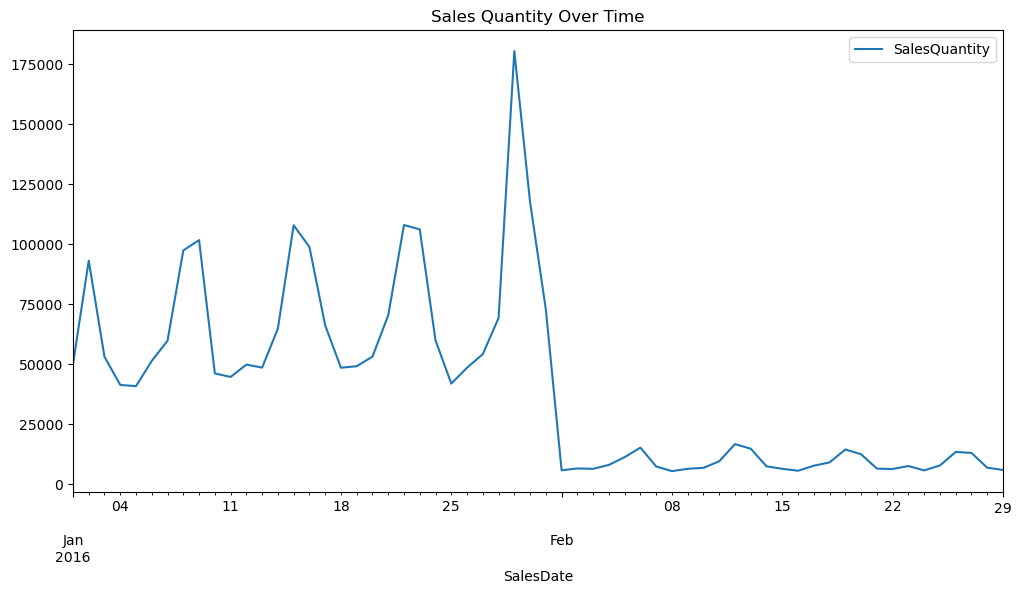

In [99]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'})
sales_quantity_trend.plot(figsize=(12, 6), title='Sales Quantity Over Time')

<Axes: title={'center': 'Average Sales Price Over Time'}, xlabel='SalesDate'>

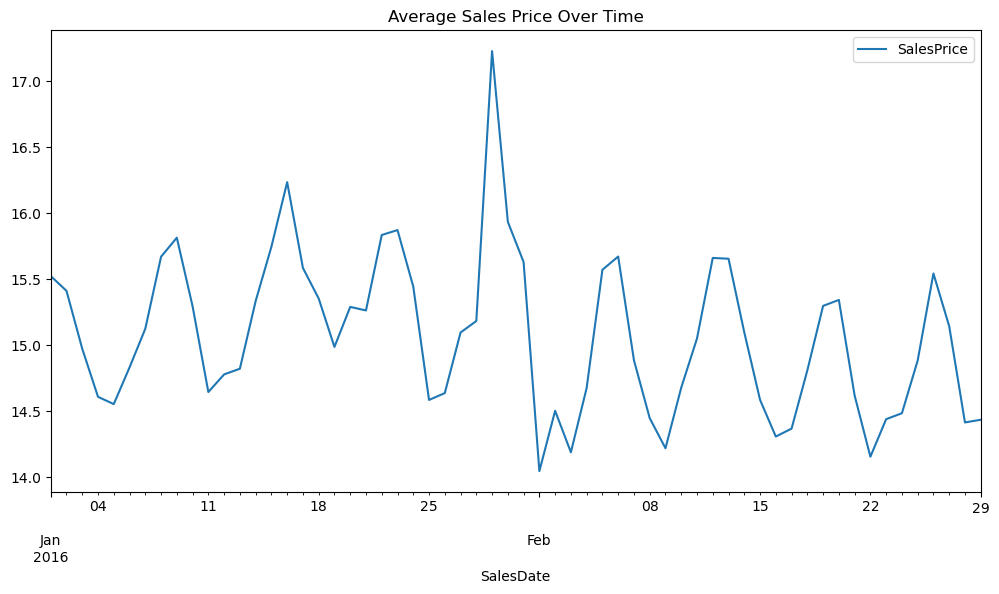

In [100]:
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(12, 6), title='Average Sales Price Over Time')

Las cantidades vendidas tienen un carácter cíclico, lo que podría indicar patrones o tendencias semanales.
Alrededor del 25 de enero se observa un pico significativo, que podría atribuirse a eventos específicos, promociones o incluso demandas estacionales. Sin embargo, a medida que nos adentramos en febrero, se produce un notable descenso de las ventas, que luego parecen estabilizarse a medida que avanza el mes.

### 4. Analisis de compra

In [101]:
vendor_purchase_volume = purchase_invoices.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))

Top 10 Vendors by Purchase Volume:
                             Quantity
VendorName                          
DIAGEO NORTH AMERICA INC     5459788
JIM BEAM BRANDS COMPANY      2737165
MARTIGNETTI COMPANIES        2640411
CONSTELLATION BRANDS INC     2325892
E & J GALLO WINERY           1858260
PERNOD RICARD USA            1647558
BACARDI USA INC              1427075
SAZERAC CO INC               1417727
M S WALKER INC               1372841
ULTRA BEVERAGE COMPANY LLP   1077527


In [102]:
vendor_purchase_cost = purchase_prices.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))

Top 10 Vendors by Purchase Cost:
                             PurchasePrice
VendorName                               
MARTIGNETTI COMPANIES            41746.36
ULTRA BEVERAGE COMPANY LLP       33882.72
PERFECTA WINES                   30584.46
SOUTHERN WINE & SPIRITS NE       18877.40
M S WALKER INC                   17710.68
MOET HENNESSY USA INC            17505.36
DIAGEO NORTH AMERICA INC         16162.68
CAMPARI AMERICA                  16026.91
JIM BEAM BRANDS COMPANY          12091.69
EDRINGTON AMERICAS               11453.53


Supply and Payment Durations:.

On average, it takes approximately 7.62 days for the supply process, which indicates a relatively quick turnaround for receiving products after placing an order.
However, the payment duration averages around 35.66 days. This could mean that there might be longer credit terms agreed upon with the vendors or there might be some delay in the payment process.

## Importante para la rotacion de stock -- > 8días

Prueba para github